In [2]:
from CreditScoreModel.LogisticScoreCard import *

# 1.数据准备

## 1.1 数据加载

In [9]:
data = pd.read_csv("./data/cs-training.csv")
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 1.2 数据清洗

### 1.2.1 数据格式整理、数据变量名修改

* 删除行索引列
* 对目标变量名进行重命名

In [11]:
del data["Unnamed: 0"]
data.columns=['y',
              'RevolvingUtilizationOfUnsecuredLines',
              'age',
              'NumberOfTime30-59DaysPastDueNotWorse',
              'DebtRatio',
              'MonthlyIncome',
              'NumberOfOpenCreditLinesAndLoans',
              'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines',
              'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfDependents'
]

### 1.2.2 缺失值分析及处理


* 特征MonthlyIncome和NumberOfDependents中含有缺失值
    - MonthlyIncome缺失值数量为29731, 相对于训练样本数量150000, 比例较大, 因此不能将该特征直接删除, 选择缺失值填充方法进行处理, 多试几种填充方法: 
        - 用均值填充；
        - 用中位数填充；
        - 用众数填充；
        - 用随机森林模型填充；
    - NumberOfDependents缺失值数量为3294个, 相对来说缺少比例较小, 因此可以直接删除；

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

def missingImpute(data):
    process_df = df.loc[:, [6, 1, 2, 3, 4, 5, 7, 8, 9, 10]]
    known = process_df[process_df.MonthlyIncome.notnull()].as_matrix()
    unknow = process_df[process_df.MonthlyIncome.isnull()].as_matrix()
    X = known[:, 1:]
    y = known[:, 0]
    rfr = RandomForestRegressor(random_state = 0, 
                                n_estimators = 200, 
                                max_depth = 3, 
                                n_jobs = -1)
    rfr.fit(X, y)
    pred = rfr.predict(unknown[:, 1:]).round(0)
    print(pred)
    df.loc[df.MonthlyIncome.isnull(), "MonthlyIncome"] = predicted
    return df

### 1.2.3 异常值处理

* 单变量离群值值检测
    - 箱线图
* 局部变量离群值因子检测
* 基于聚类方法的离群值检测方法

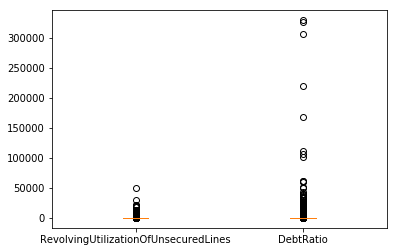

In [15]:
x1 = data["RevolvingUtilizationOfUnsecuredLines"]
x2 = data["DebtRatio"]
x3 = data["NumberOfTime30-59DaysPastDueNotWorse"]
x4 = data["NumberOfTime60-89DaysPastDueNotWorse"]
x5 = data["NumberOfTimes90DaysLate"]


def plot_box(var, labels):
    """
    # var = []
    # labels = []
    """
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.boxplot(var)
    ax.set_xticklabels(labels)

plot_box([x1, x2], ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"])

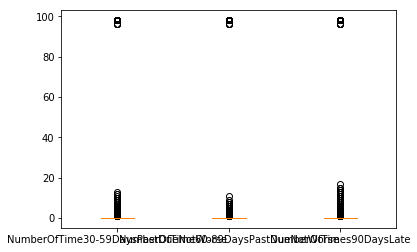

In [16]:
plot_box([x3, x4, x5], 
         ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"])

# 2.创建测试集

In [14]:
ls = logistic_score_card(max_deeps = 2, 
                         min_info_gain_epos = 0.0001, 
                         max_corr = 0.8,
                         min_iv = 0.1, 
                         C = 0.1)

data_train, data_test = ls.get_data_train_test(data, 
                                               test_size = 0.25, 
                                               random_state = 1234)

# 3.训练模型

In [15]:
ls.fit(data_train)

2019 15:54:34 INFO 任务开始. . . 
2019 15:54:34 INFO 连续和离散变量划分中. . . 
2019 15:54:34 INFO 连续和离散变量划分完成!
2019 15:54:34 INFO 连续变量最优分组进行中. . . 
100%|██████████| 10/10 [15:12<00:00, 43.30s/it]
2019 16:09:47 INFO 连续变量最优分组完成!
2019 16:09:47 INFO 根据cut离散化连续变量进行中. . . 
100%|██████████| 10/10 [00:01<00:00,  6.56it/s]
2019 16:09:48 INFO 根据cut离散化连续变量完成!
2019 16:09:48 INFO 计算所有变量IV值进行中. . . 
100%|██████████| 10/10 [00:03<00:00,  3.02it/s]
2019 16:09:52 INFO 计算所有变量IV值完成!
2019 16:09:52 INFO 数据WOE转化进行中. . . 
100%|██████████| 10/10 [00:05<00:00,  2.03it/s]
2019 16:09:57 INFO 数据WOE转化完成
2019 16:09:57 INFO 根据IV值大于 0.1 且 相关性小于 0.8 , 以及l1正则选取变量进行中. . . 
100%|██████████| 5/5 [00:00<00:00, 161.75it/s]
/home/wangzhefeng/project/mlenv/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
2019 16:09:58 INFO 变量选取完成, 总共 10 个变量, 最终筛选出 5 个变量
/home/wangzhefeng/project/mlenv/env/lib/py

In [ ]:
# 查看制作好的评分卡
ls.score_card

# 模型准确性
ls.logistic_auc_ks

# 模型准确性图形显示
ls.plot_roc_ks(data_train, ls.cut_points_result, ls.score_card)

# 查看各变量的IV值
ls.col_type_cut_jv

# 最终模型的变量
ls.col_result

# 各变量切分点
ls.cut_points_reust

# 4.预测

In [ ]:
# 在测试集上检测模型准确率
ls.score(data_test, ls.cut_points_result, ls.score_card)

In [ ]:
# 读取数据
data_test = pd.read_csv("/home/wangzhefeng/project/mlenv/mlproj/data/Credit/cs-test.csv")
ls.predict_score_proba(data_test, 
                       ls.cut_points_results, 
                       ls.score_card)